<a href="https://colab.research.google.com/github/basunepal/Basic-EDA-and-Data-Cleaning/blob/main/House_Sales_in_King_County%2C_USA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Project Description

This project involves conducting an exploratory data analysis (EDA) on the King County House Sales dataset, which includes detailed information about house features, locations, and prices. We will analyze key factors affecting house prices, identify patterns and trends, handle missing data, and clean the dataset for further modeling. Additionally, outlier detection and feature engineering will be applied to enhance data insights and usability. The final dataset will be prepared for machine learning applications, ensuring it is standardized, normalized, and free from inconsistencies.


##Objective

- Analyzing housing data to uncover patterns in prices and features.
- Handling missing data effectively.
- Standardizing features for consistent analysis.
- Detecting and dealing with outliers.
- Creating new features to enhance insights.

##Data Science Tools

* Pandas: Data manipulation and cleaning
* Numpy: Handling missing values and numerical operations
* Seaborn & Matplotlib: Data visualization

#Dataset

Source: House Sales in King County, USA, available on [Kaggle](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction).

## 1. Data Loading and Initial Exploration

Goal: Load the dataset and conduct a quick inspection to understand its structure.

Steps:
  * Import necessary libraries (pandas, numpy, matplotlib, seaborn).
  * Load the dataset from a CSV file.
  * Display the first few rows, check data types, null values, and basic statistics.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('kc_house_data.csv')

In [2]:
 # Display first few rows and summary statistics
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


## 2. Handling Missing Data

Objective: Identify and address missing values in the dataset to ensure clean data for analysis.

Tasks:

* Calculate the percentage of missing data for each column.
* Drop columns with excessive missing data (e.g., waterfront if applicable).
* Impute missing values in relevant columns using the median or mode.
* Visualize missing data patterns.

In [5]:
# Check for missing values
missing_values = df.isnull().sum() / len(df) * 100
print("Missing Values Percentage:\n", missing_values)

Missing Values Percentage:
 id               0.0
date             0.0
price            0.0
bedrooms         0.0
bathrooms        0.0
sqft_living      0.0
sqft_lot         0.0
floors           0.0
waterfront       0.0
view             0.0
condition        0.0
grade            0.0
sqft_above       0.0
sqft_basement    0.0
yr_built         0.0
yr_renovated     0.0
zipcode          0.0
lat              0.0
long             0.0
sqft_living15    0.0
sqft_lot15       0.0
dtype: float64


Our data does not have missing values

In [6]:
df['waterfront'].value_counts()

,count
waterfront,
0,21450
1,163


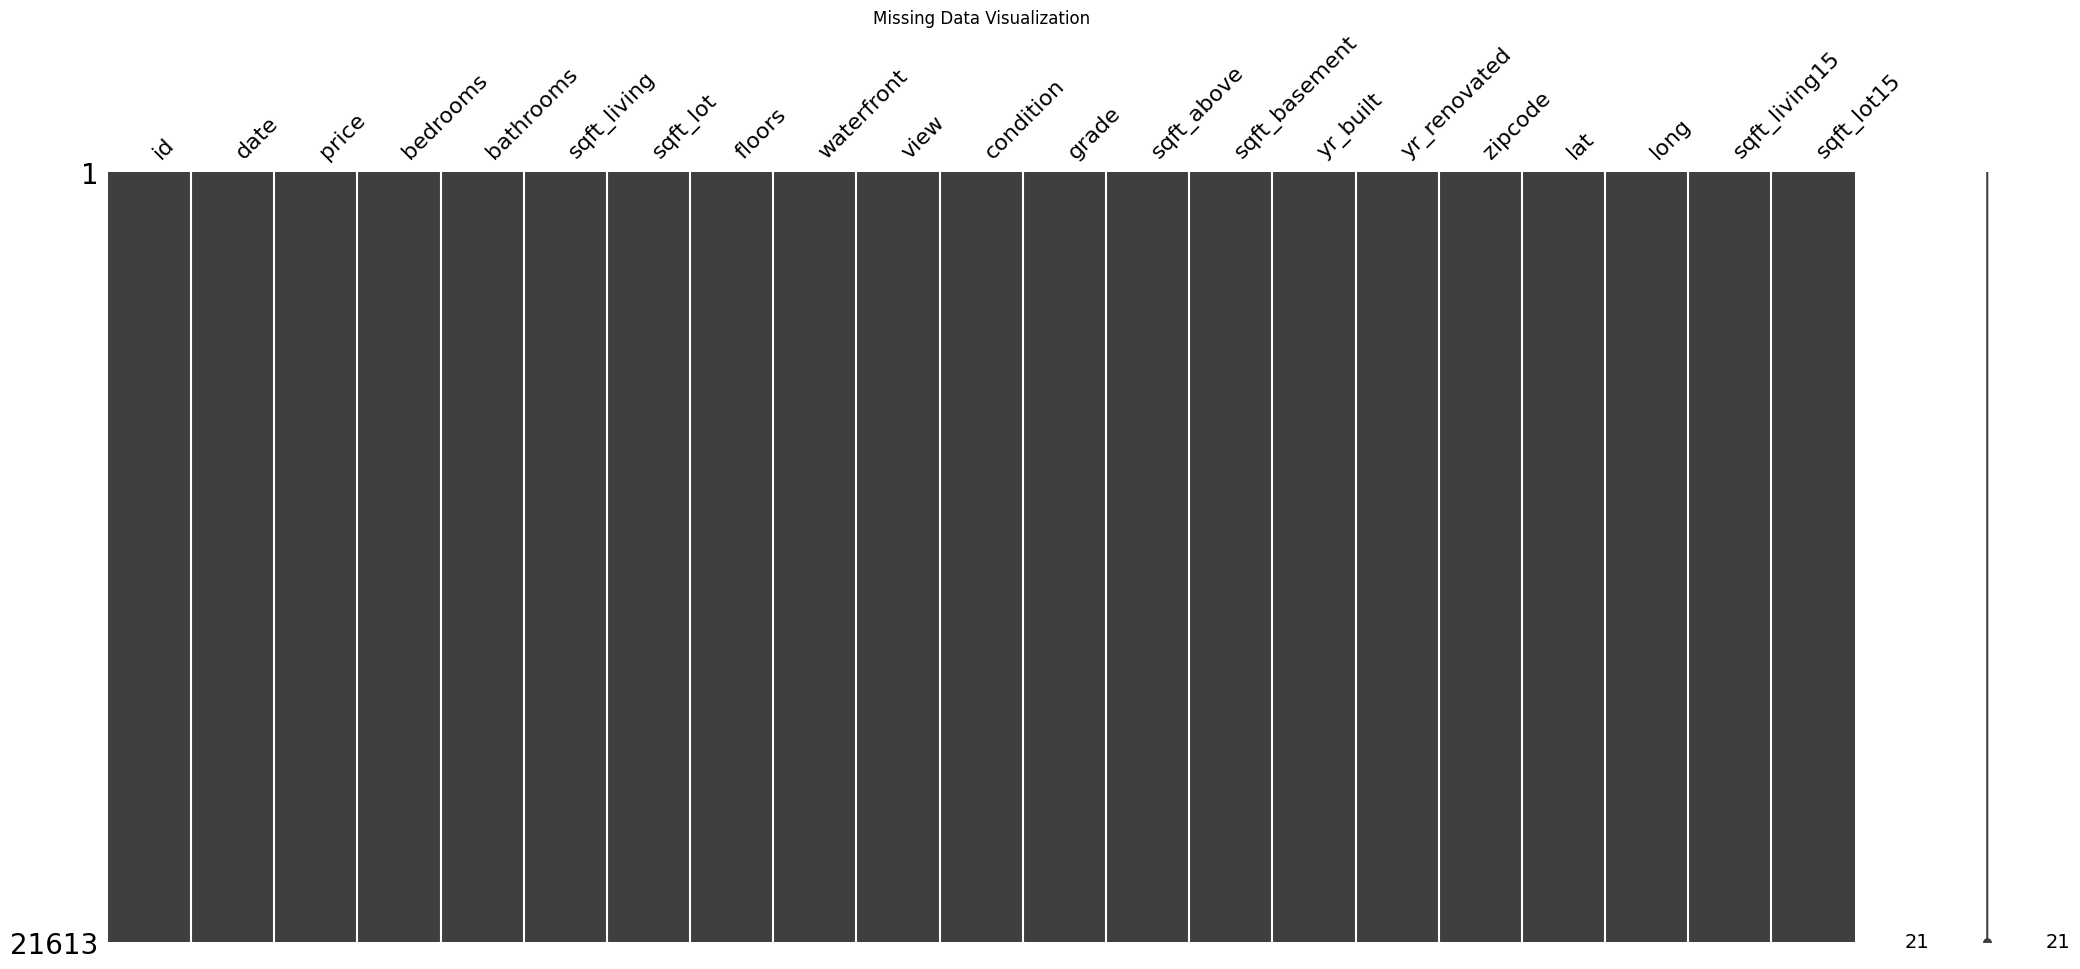

In [7]:
# Visualize missing data
import missingno as msno
msno.matrix(df)
plt.title('Missing Data Visualization')
plt.show()


## 3. Feature Engineering

Objective: Enhance the dataset by creating new features to uncover hidden patterns and better understand the data.

Tasks:

* Calculate the house's age using the yr_built column.
* Create a binary feature indicating whether the house was renovated.
* Calculate a new feature for better comparison of prices.

In [8]:
# Create a feature for the age of the house
df['house_age'] = 2024 - df['yr_built']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,69
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,73
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,91
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,59
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,37


In [9]:
df['yr_renovated'].value_counts()

,count
yr_renovated,
0,20699
2014,91
2013,37
2003,36
2005,35
...,...
1951,1
1959,1
1948,1


In [10]:
df['is_renovated'] = np.where(df['yr_renovated'] > 0, 1, 0)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,is_renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,69,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,73,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,91,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,59,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,37,0


In [11]:
# Create a price per square foot feature
df['price_per_sqft'] = df['price'] / df['sqft_living']
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,house_age,is_renovated,price_per_sqft
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1955,0,98178,47.5112,-122.257,1340,5650,69,0,188.050847
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,1951,1991,98125,47.7210,-122.319,1690,7639,73,1,209.338521
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,1933,0,98028,47.7379,-122.233,2720,8062,91,0,233.766234
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1965,0,98136,47.5208,-122.393,1360,5000,59,0,308.163265
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1987,0,98074,47.6168,-122.045,1800,7503,37,0,303.571429


## 4. Exploratory Data Analysis (EDA) and Visualization

Objective: Analyze patterns in house prices and features using visualizations and summary statistics.

Tasks:

* Analyze price trends by: *zipcode* (location), *bedrooms, bathrooms, house_age* and *sqft_living.*
* Use visualizations to identify outliers and correlations.

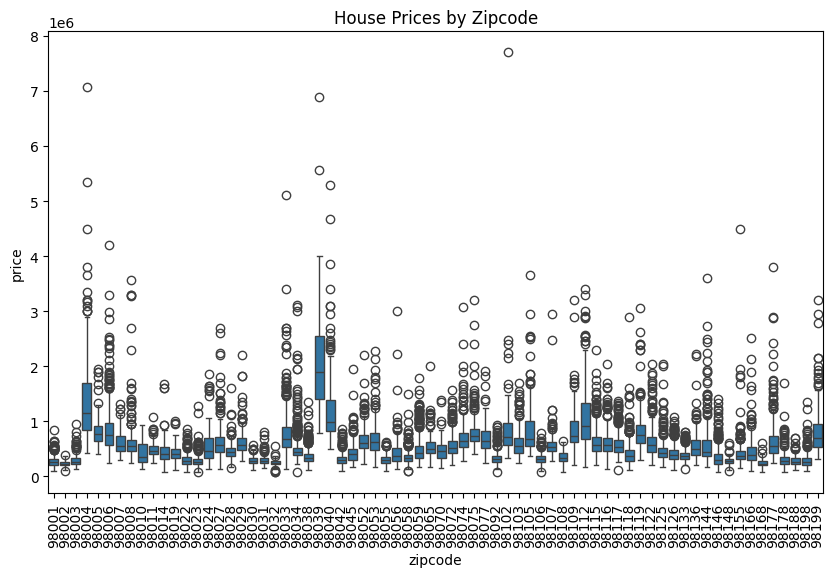

In [12]:
#House prices by Zipcode
plt.figure(figsize=(10, 6))
sns.boxplot(x='zipcode', y='price', data=df)
plt.xticks(rotation=90)
plt.title('House Prices by Zipcode')
plt.show()

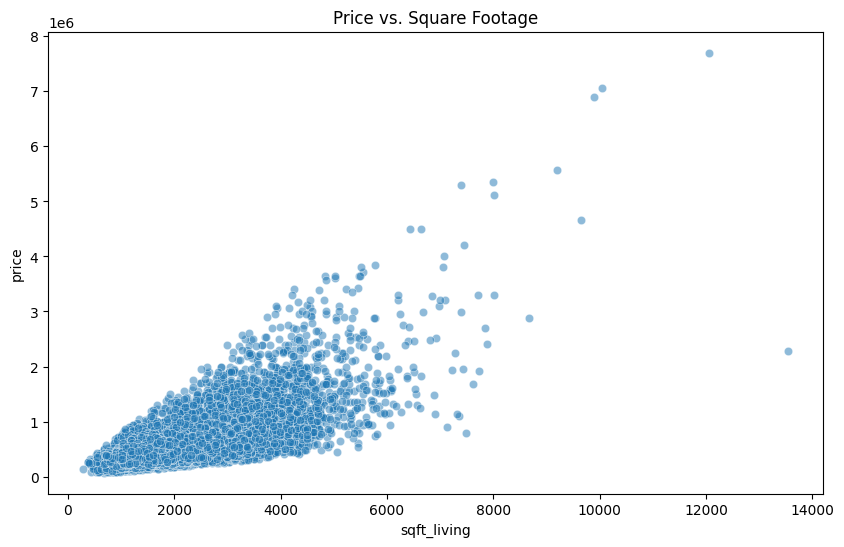

In [13]:
# Scatter plot for sqft_living vs price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sqft_living', y='price', data=df, alpha=0.5)
plt.title('Price vs. Square Footage')
plt.show()

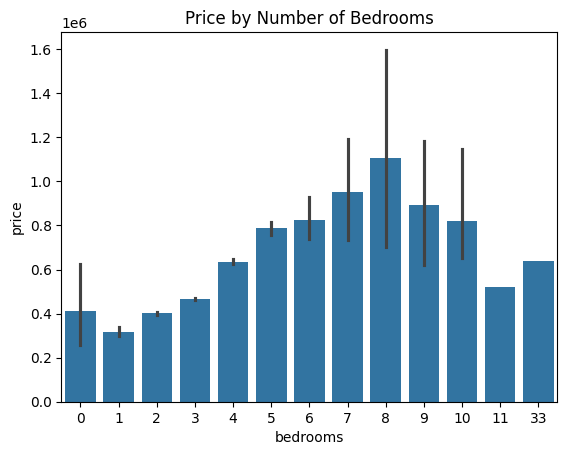

In [14]:
# Bar plot for price by bedrooms
sns.barplot(x='bedrooms', y='price', data=df)
plt.title('Price by Number of Bedrooms')
plt.show()


## 5. Detecting and Handling Outliers

Objective: Identify and handle outliers in critical numerical features.

Tasks:

* Detect outliers in price, sqft_living, and bedrooms.
* Remove or cap extreme values to prevent distortion in further analysis.

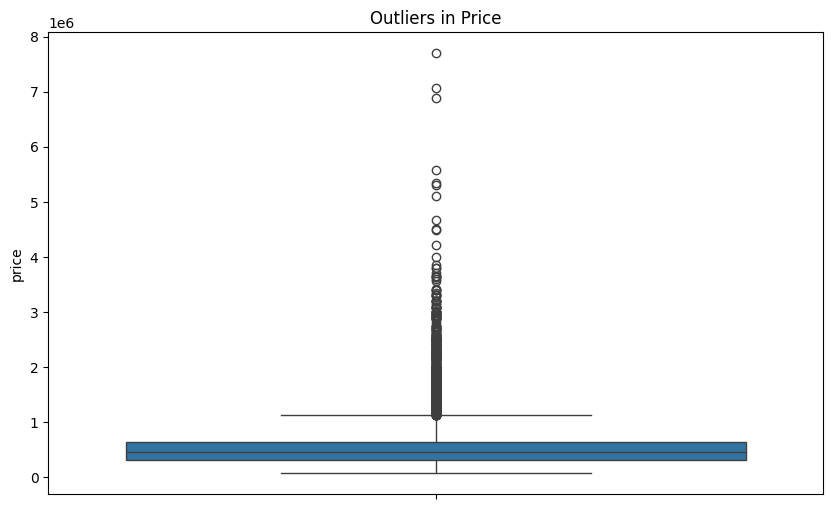

In [15]:
# Detect outliers using boxplots
plt.figure(figsize=(10, 6))
sns.boxplot(df['price'])
plt.title('Outliers in Price')
plt.show()

In [16]:
# Remove extreme outliers in price
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

## 6. Feature Standardization and Normalization

Objective: Prepare numerical features by scaling them to facilitate consistent analysis and modeling.

Tasks:

* Standardize numerical features (sqft_living, price_per_sqft) to have mean zero and unit variance.

In [17]:
df[['sqft_living', 'price_per_sqft']].describe()

,sqft_living,price_per_sqft
count,20467.000000,20467.000000
mean,1975.558167,254.424523
std,774.833460,100.373830
min,290.000000,87.588235
25%,1400.000000,179.012346
50%,1860.000000,238.095238
75%,2431.000000,305.612245
max,7480.000000,810.138889


In [18]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical features
scaler = StandardScaler()
df[['sqft_living', 'price_per_sqft']] = scaler.fit_transform(df[['sqft_living', 'price_per_sqft']])

# View standardized numerical features
df[['sqft_living', 'price_per_sqft']].describe()


,sqft_living,price_per_sqft
count,2.046700e+04,2.046700e+04
mean,1.666392e-17,-1.027609e-16
std,1.000024e+00,1.000024e+00
min,-2.175434e+00,-1.662190e+00
25%,-7.428335e-01,-7.513315e-01
50%,-1.491430e-01,-1.626887e-01
75%,5.878076e-01,5.099833e-01
max,7.104206e+00,5.536582e+00


## 7. Correlation Analysis

Objective: Identify correlations among features and with house prices.

Tasks:

- Visualize correlations using a heatmap.
- Highlight features with strong correlations with price.

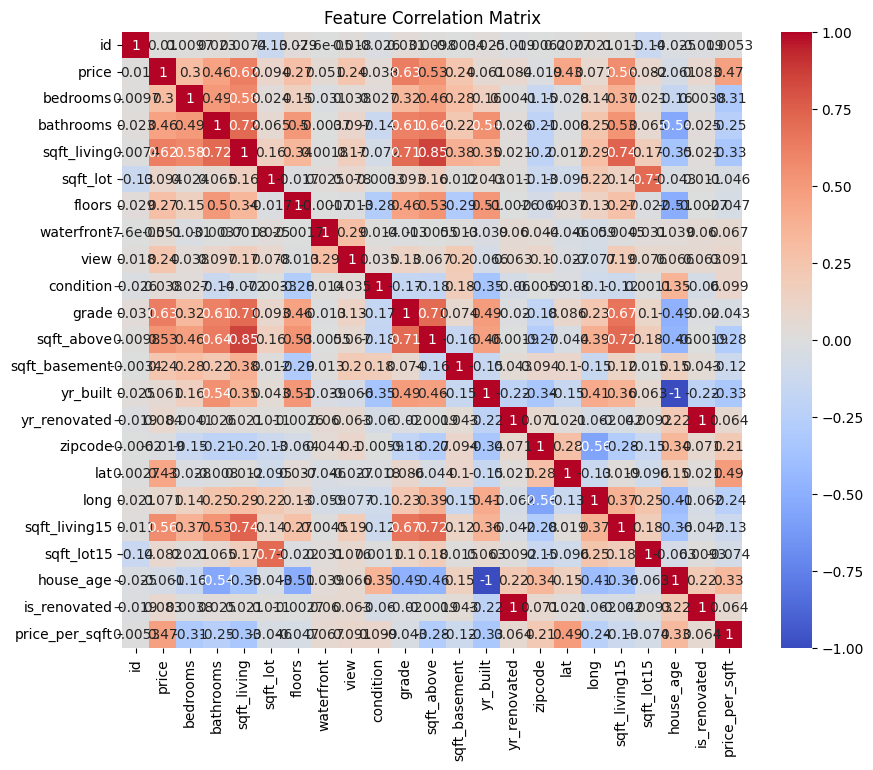

In [19]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [20]:
corr = df.corr(numeric_only=True)['price']
corr

,price
id,0.010416
price,1.000000
bedrooms,0.296956
bathrooms,0.455927
sqft_living,0.622333
sqft_lot,0.093950
floors,0.273987
waterfront,0.051449
view,0.238268
condition,0.038275


In [21]:
imp_features = corr[df.corr(numeric_only=True)['price']>0.1].index
imp_features

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'floors', 'view',
       'grade', 'sqft_above', 'sqft_basement', 'lat', 'sqft_living15',
       'price_per_sqft'],
      dtype='object')

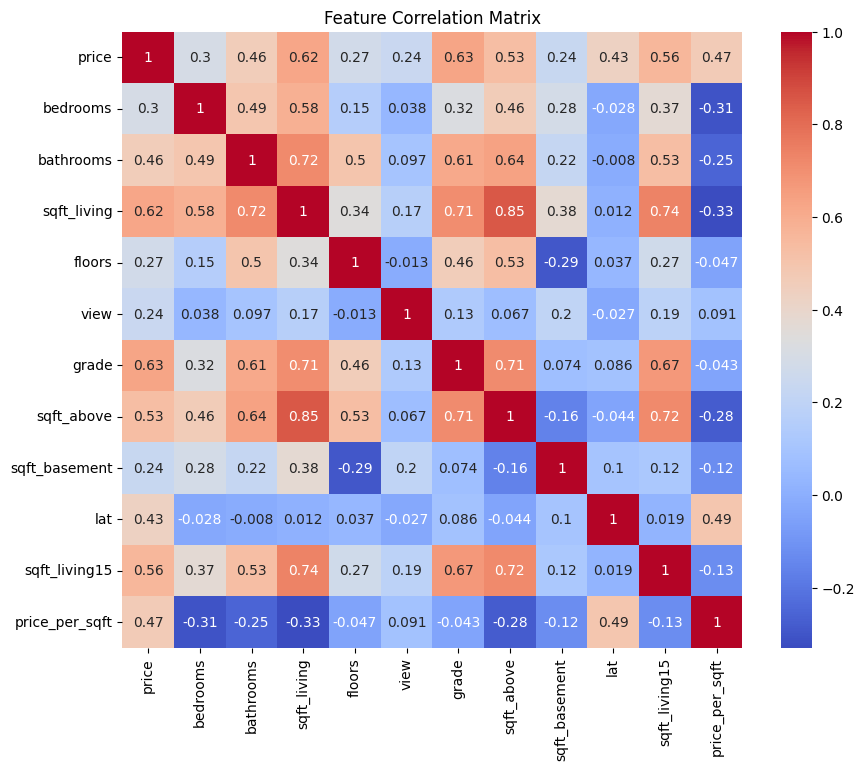

In [22]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df[imp_features].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

## Summary

In this analysis, we explored the housing price in King County, USA and performed necessary data cleaning. Key insights include:
- House prices vary significantly by location (zipcode) and size (sqft_living).
- Features like price_per_sqft, bedrooms, and house_age provide additional insights.
- After outlier handling and standardization, the dataset is now clean and ready for further analysis.